In [120]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment

In [121]:
data = pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. To Check the basic details of the dataset

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
#Dataset has total 891 entries and 11 columns.

In [124]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
#It has 11 columns and 891 rows.
#It has missing values in Age,Cabin and Embarked columns


# 3.Handling Null values in the dataset

In [127]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
# Age column has 177 null values ,Cabin has 687 null values and Embarked column has 2 null values

In [129]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [130]:
data['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [131]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [132]:
#Filling Null values of Age with mean age values

data['Age']=data['Age'].fillna(data['Age'].mean())


#Droping Cabin column since most of the values are null

data.drop(['Cabin'],axis = 1,inplace=True)

#Null values in Embarked column filled with Mode of the values in that column

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [134]:
data.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 4. Check and handle outliers in the dataset

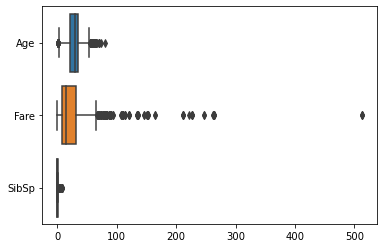

In [135]:
sns.boxplot(data=data[['Age', 'Fare','SibSp']], orient='h')
plt.show()

In [136]:
col_names=['Age', 'Fare','SibSp']
 
for i in col_names:

        Q1 = np.percentile(data[i],25,interpolation='midpoint')
        Q2 = np.percentile(data[i],50,interpolation='midpoint')
        Q3 = np.percentile(data[i],75,interpolation='midpoint')
        IQR = Q3-Q1
        low_lim = Q1 - 1.5*IQR
        up_lim = Q3 + 1.5*IQR
        
        ind1=data[i]>up_lim
        
        ind2=data[i]<low_lim
        
        
        data.loc[ind1,i]=up_lim
        data.loc[ind2,i]=low_lim


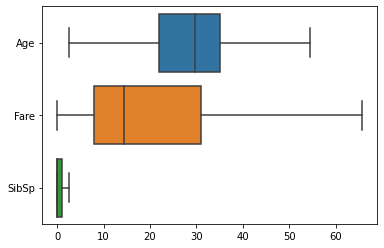

In [137]:
sns.boxplot(data=data[['Age', 'Fare','SibSp']], orient='h')
plt.show()

In [138]:
x = data.drop(['Age','Survived','Name','Ticket','PassengerId'],axis=1)
y = data['Survived']


# Encoding

In [139]:
x=pd.get_dummies(x)


In [140]:
x

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,0,7.2500,0,1,0,0,1
1,1,1.0,0,65.6344,1,0,1,0,0
2,3,0.0,0,7.9250,1,0,0,0,1
3,1,1.0,0,53.1000,1,0,0,0,1
4,3,0.0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0.0,0,13.0000,0,1,0,0,1
887,1,0.0,0,30.0000,1,0,0,0,1
888,3,1.0,2,23.4500,1,0,0,0,1
889,1,0.0,0,30.0000,0,1,1,0,0


#  Scaling

In [141]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1)) 
x = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.170595,0.063599,0.366375,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.418036,0.283298,0.134343,0.312056,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.120522,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.220223,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.400000,0.000000,0.472313,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# SPLITING DATA INTO TRAIN AND TEST

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Naïve Bayes’ Classifier

In [143]:
from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()
classifer.fit(x_train,y_train)
y_pred = classifer.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
cs = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(cs)
print(acc)

[[79 26]
 [16 58]]
0.7653631284916201


# Naïve Bayes’ Classifier (Bernoulli)

In [144]:
from sklearn.naive_bayes import BernoulliNB
cla = BernoulliNB()
cla.fit(x_train,y_train)
y_pred = cla.predict(x_test)
cs = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(cs)
print(acc)

[[86 19]
 [21 53]]
0.776536312849162


Naïve Bayes’ Classifier-Gaussian gives 76% accuracy
Bernoulli classifier gives 77% accuracy

# Hyper Parameter Tuning

In [145]:
classifer.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [146]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [147]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


CV_ng = GridSearchCV(estimator=classifer, param_grid=params_NB, cv= cv_method,verbose = 1, scoring = 'accuracy'

CV_ng.fit(x_train,y_train)
CV_ng.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.8111308307896871}

In [148]:
CV_ng.best_score_

0.7879707147312782

In [149]:

predictions = CV_ng.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, predictions))

Accuracy score =  0.7821229050279329


After HyperParameter Tuning, Accuracy is improved as 78% for Naïve Bayes’ Classifier(Gaussian)